In [158]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pylab import *
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn import preprocessing
import random
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering

df = pd.read_csv('PreprocessingProject3.csv')
df.columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
#Breyta type í numeric frá 1-4
df['Type']=pd.factorize(df['Type'])[0]+1

#Dropa Type
df.drop('Type',axis='columns', inplace=True)


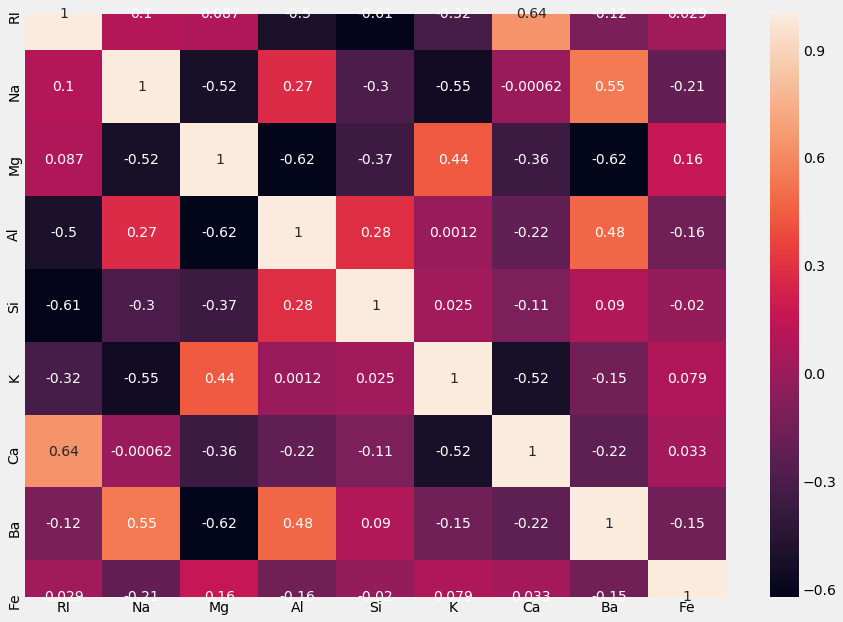

In [159]:
plt.figure(figsize=(14, 10))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot = True)
plt.show()

In [148]:
kmeans.fit(df)

#The lowest SSE value
kmeans.inertia_

#Final location of the centroid
kmeans.cluster_centers_

#the number of iterations required to converge
kmeans.n_iter_

15

In [216]:
SSE = []


kmeans = KMeans(n_clusters=4, random_state = 200)
kmeans.fit(df)
SSE.append(kmeans.inertia_)
print(SSE)

[24.26320912193087]


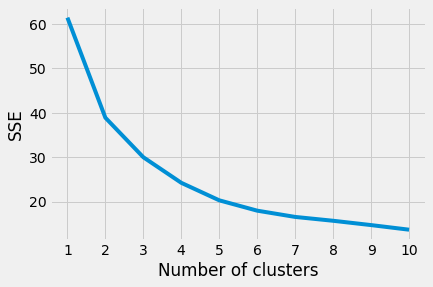

In [186]:
#Elbow aðferð til að finna besta k
kmeans_kwargs = {
        "init": "random",
        "n_init":10,
        "max_iter":300,
        "random_state": None,
        }

SSE = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)
plt.style.use("fivethirtyeight")
plt.plot(range(1,11), SSE)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In [187]:
kl = KneeLocator(
        range(1,11), SSE, curve ="convex", direction="decreasing"
        )
kl.elbow

4

In [164]:
km2 = KMeans(n_clusters=2, n_init=5)
cluster2 =km2.fit_predict(df)

km3 = KMeans(n_clusters=3,n_init=5)
cluster3 = km3.fit_predict(df)

In [131]:
df['cluster'] = y_predicted
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,cluster
0,0.297629,0.309774,0.779510,0.258567,0.575000,0.103060,0.310409,0.000000,0.000000,1
1,0.231782,0.215038,0.783964,0.330218,0.550000,0.091787,0.288104,0.000000,0.000000,1
2,0.297629,0.372932,0.775056,0.348910,0.505357,0.095008,0.278810,0.000000,0.000000,1
3,0.080773,0.551880,0.387528,0.389408,0.846429,0.000000,0.200743,0.000000,0.000000,0
4,0.237050,0.303759,0.634744,0.358255,0.617857,0.091787,0.312268,0.034921,0.431373,1


In [165]:
#fyrir 3 clustera
km3 = KMeans(n_clusters=3,n_init=10)
cluster3 = km3.fit_predict(df)

def attributeskm(attr1, attr2):
    plt.figure(figsize=(10,6))
    plt.scatter(df[attr1], df[attr2], c=km3.labels_)
    return plt.show()
#print(attributeskm('RI','Na'))
#print(attributeskm('Mg','Al'))

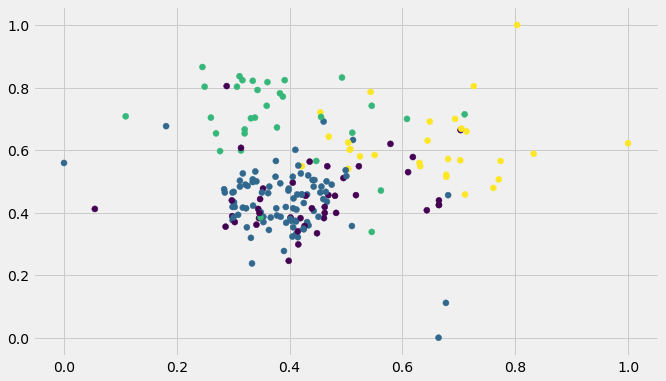

None


In [206]:
#4 clusterar
km4 = KMeans(n_clusters=4, n_init=10)
cluster4 = km4.fit_predict(df)

def attributeskm4seed10(attr1, attr2):
    plt.figure(figsize=(10,6))
    plt.scatter(df[attr1], df[attr2], c=km4.labels_)
    return plt.show()



print(attributeskm4seed10('RI','Na'))

In [118]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.297629,0.309774,0.779510,0.258567,0.575000,0.103060,0.310409,0.000000,0.000000
1,0.231782,0.215038,0.783964,0.330218,0.550000,0.091787,0.288104,0.000000,0.000000
2,0.297629,0.372932,0.775056,0.348910,0.505357,0.095008,0.278810,0.000000,0.000000
3,0.080773,0.551880,0.387528,0.389408,0.846429,0.000000,0.200743,0.000000,0.000000
4,0.237050,0.303759,0.634744,0.358255,0.617857,0.091787,0.312268,0.034921,0.431373


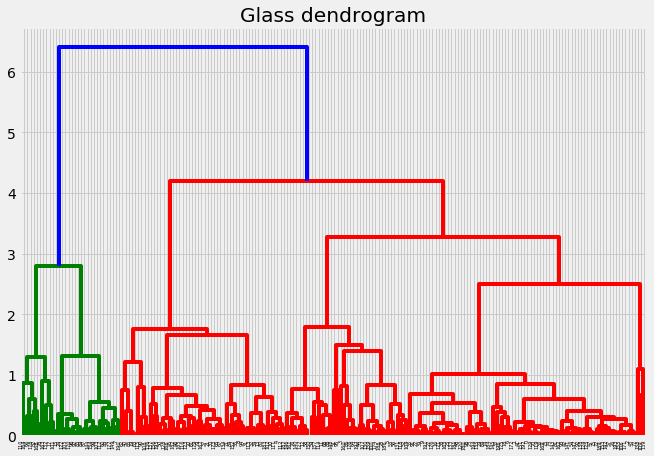

In [192]:
#Dendrogram
plt.figure(figsize=(10, 7))
plt.title("Glass dendrogram")
dend = shc.dendrogram(shc.linkage(df, method='ward'))

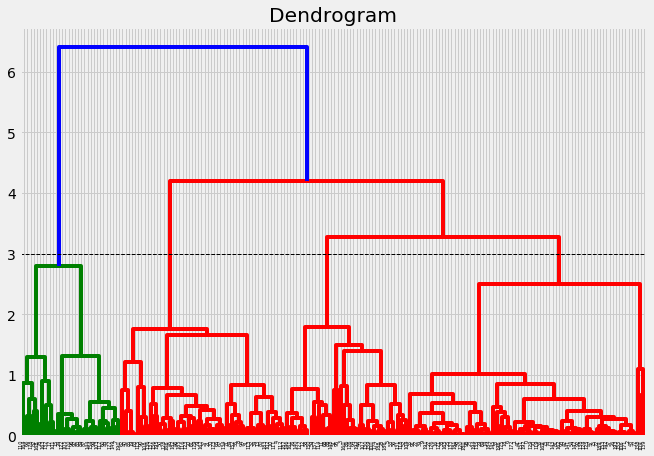

In [199]:
plt.figure(figsize=(10,7))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(df, method='ward'))
plt.axhline(y=3, color='black', linestyle='--', linewidth = 1)

In [190]:
Hier = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
Hier.fit_predict(df)

array([1, 1, 1, 3, 2, 3, 1, 0, 2, 1, 2, 3, 3, 2, 1, 0, 1, 0, 1, 2, 2, 2,
       1, 1, 0, 1, 1, 1, 3, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       3, 2, 2, 1, 1, 0, 2, 3, 3, 3, 1, 2, 3, 1, 3, 3, 0, 2, 2, 2, 3, 2,
       0, 2, 3, 1, 1, 2, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 0, 0, 2, 2, 3, 0,
       3, 0, 2, 1, 1, 1, 2, 3, 0, 0, 1, 0, 3, 0, 2, 0, 3, 0, 1, 3, 2, 1,
       0, 2, 2, 2, 3, 2, 2, 0, 3, 1, 1, 1, 0, 2, 1, 1, 1, 3, 2, 1, 3, 3,
       0, 1, 2, 1, 2, 2, 1, 1, 3, 1, 1, 1, 0, 1, 3, 1, 3, 0, 3, 1, 2, 1,
       0, 1, 2, 3, 1, 3, 3, 3, 1, 0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 2, 3, 1,
       3, 0, 0, 2, 1, 1, 2, 2, 1, 2, 3, 2, 3, 1, 0, 1, 1, 1, 1, 2, 1, 3],
      dtype=int64)

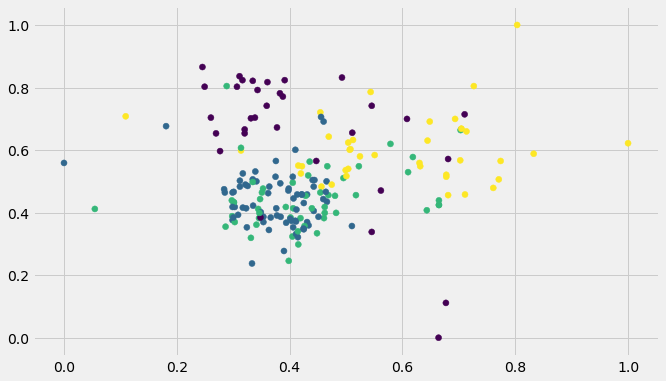

None


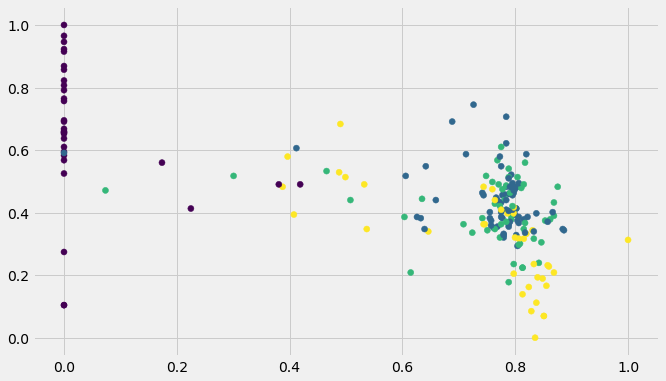

None


In [191]:
#til að plotta clusterinn þá þurfum við 2 attributes úr þessum db
def aggloAttr(attr1,attr2):
    plt.figure(figsize=(10,6))
    plt.scatter(df[attr1], df[attr2], c=Hier.labels_)
    return plt.show()
    
print(aggloAttr('RI','Na'))
print(aggloAttr('Mg','Al'))
    
